In [204]:
# Import packages for data loading
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Dataset and utils
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Additional packages
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn.pipeline import make_pipeline

# Importing Data:

In [205]:
# Load dataset
dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [206]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [207]:
print("Feature names:\n")
print(dataset.feature_names)

Feature names:

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [208]:
# defining X and y
X = np.array(dataset.data) # Features
y = np.array(dataset.target) # Prices

print(f"X shape: {X.shape}. Target variable: {y.shape}")

X shape: (506, 13). Target variable: (506,)


# Preparing Data:

I decided to choose Number of rooms as a feature. and price as an output.

In [209]:
# Select RM (Number of rooms) feature from X
X_rm = X[:, 5].reshape(-1,1) 
y_price = y.reshape(-1,1)

print(X_rm.shape)
print(y_price.shape)

(506, 1)
(506, 1)


The data points are as below:

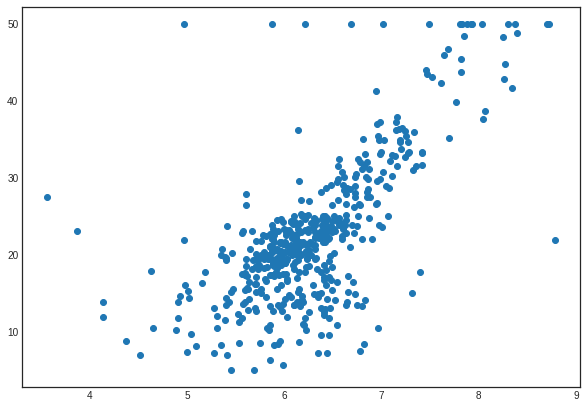

In [210]:
plt.figure(figsize=(10, 7))
plt.scatter(X_rm, y_price)
plt.show()

In [211]:
#Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_rm, y_price, test_size=0.2, random_state=5)

In [212]:
# Add intercept term to X_train
print(f"X_train shape: {X_train.shape} (without intercept term)")
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(f"X_train shape: {X_train.shape} (with intercept term)")

X_train shape: (404, 1) (without intercept term)
X_train shape: (404, 2) (with intercept term)


# Method 1: Linear Regression with one line code of python:

In [213]:
#Linear Regression using ready python code

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)
print('intercept:' , reg.intercept_)

Coefficients:  [[0.         8.82345634]]
intercept: [-32.83912991]


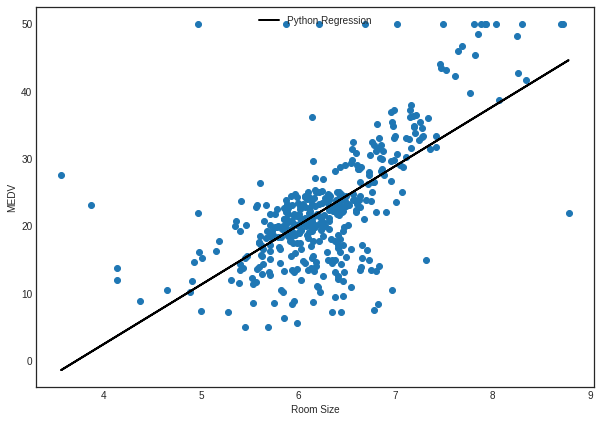

In [214]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_train[:,1], y_train)

Line1 = reg.intercept_[0] + X_train[:,1] * reg.coef_[0,1]

plt.plot(X_train[:,1], Line1, color='black', linewidth = 2, label='Python Regression')

plt.ylabel('MEDV')
plt.xlabel('Room Size')
leg = plt.legend(loc='upper center')
plt.show()

The black line is the answer found by linear regression code that is available in python.

In order to see the difference between this line with the one we studied in theory. I decided to use the closed form formula to calculate the coefficients:

# Method 2: Closed-form formula

In [215]:
#Linear Regression easy mode (using closed-form)
def normalEqn(X, y):
  theta_Normal = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(y)
  return theta_Normal

In [216]:
theta_closedform = normalEqn(X_train, y_train)
print(theta_closedform)

[[-32.83912991]
 [  8.82345634]]


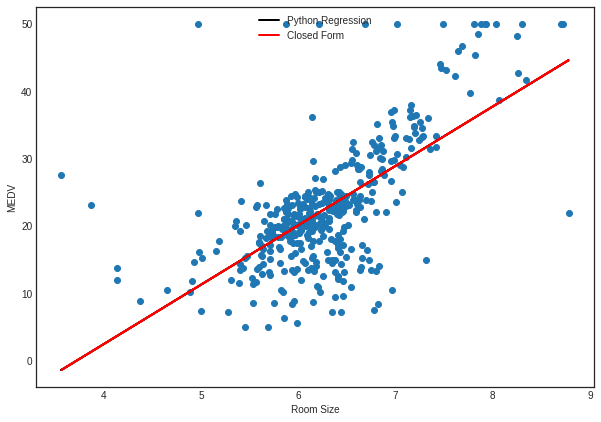

In [217]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_train[:,1], y_train)

Line1 = reg.intercept_[0] + X_train[:,1] * reg.coef_[0,1]
Line2 = theta_closedform[0] + X_train[:,1] * theta_closedform[1]

plt.plot(X_train[:,1], Line1, color='black', linewidth = 2, label='Python Regression')
plt.plot(X_train[:,1], Line2, color='red', linewidth = 2, label='Closed Form')

plt.ylabel('MEDV')
plt.xlabel('Room Size')
leg = plt.legend(loc='upper center')
plt.show()

As we can see here, both lines are equal. so as a concolusion, python use the closed form for its function.

# Method 3: Gradient Descent (Zero initial parameters)

Now, Lets build a linear regression using gradient descent algorithm.
First I define 2 functions. first one to compute cost (SSE) and the other one the gradient decent function.

In [218]:
# Loss function - Sum of Squared Errors (SSE)
def compute_cost(X, y, theta):
  m = X.shape[0]
  h = np.dot(X,theta)
  J = np.sum(np.square(h - y)) / (2*m)
  return J

In [219]:
def gradient_descent(X, y, theta, learning_rate, num_iters):

  n_sample, n_feat = X.shape[0], theta.shape[0] - 1
  theta_history = np.zeros([(n_feat + 1), num_iters])
  J_history = np.zeros([num_iters,1])
  
  for i in range(num_iters):
    h = np.dot(X, theta)
    dtheta = np.dot((h-y).T,X).T / n_sample
    theta = theta - learning_rate*dtheta
    theta_history[:,i] = theta[:,0]
    J_history[i] = compute_cost(X,y,theta)
    #print(theta_history[0])
  return (theta, theta_history, J_history)

In [220]:
# Define and initialize parameters
theta = np.zeros((X_train.shape[1], 1))
print(f"{theta}")

[[0.]
 [0.]]


In [221]:
num_iters = 500
learning_rate = 0.0005
initial_cost = compute_cost(X_train, y_train, theta)
print("J (initial): ", initial_cost, "\n")

J (initial):  299.38922029702974 



In [222]:
# Apply gradient descent algorithm
(theta, theta_history, J_history) = gradient_descent(X_train, y_train, theta, learning_rate, num_iters)
print(f"Optimal parameters: [{theta[0]}, {theta[1]}]")
print(f"J (final): {J_history[-1]}")

Optimal parameters: [[0.4643156], [3.58922423]]
J (final): [30.94282509]


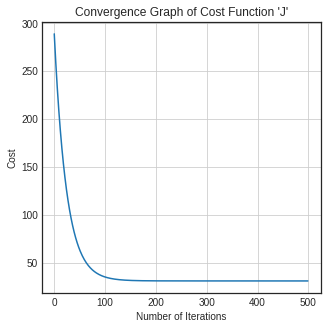

In [223]:
# Plot J history
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function 'J'")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

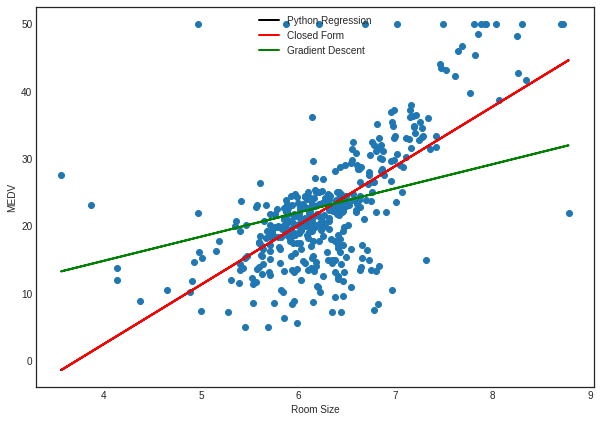

In [224]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_train[:,1], y_train)

Line1 = reg.intercept_[0] + X_train[:,1] * reg.coef_[0,1]
Line2 = theta_closedform[0] + X_train[:,1] * theta_closedform[1]
Line3 = theta[0] + X_train[:,1] * theta[1]

plt.plot(X_train[:,1], Line1, color='black', linewidth = 2, label='Python Regression')
plt.plot(X_train[:,1], Line2, color='red', linewidth = 2, label='Closed Form')
plt.plot(X_train[:,1], Line3, color='green', linewidth = 2, label='Gradient Descent')

plt.ylabel('MEDV')
plt.xlabel('Room Size')
leg = plt.legend(loc='upper center')
plt.show()

The Green line is the result we have got on the training data for gradient decent.

As we can see, the result for gradient descent is not according to what we expected. at the begining I thought maybe the number iteration and learning rate is wrong. which then I fixed them according to below figure and based on my J plot:

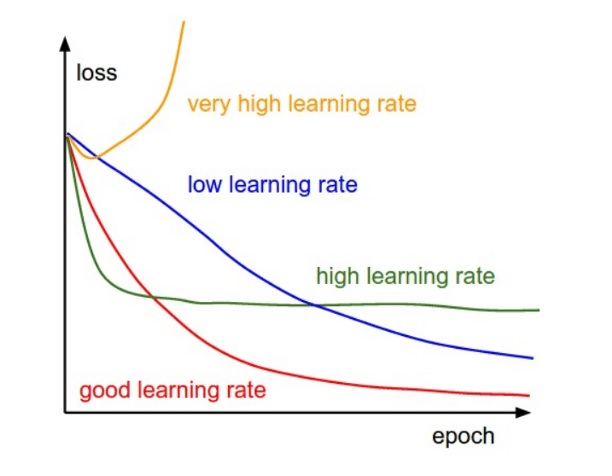

Then I remembered that the problem with gradent descent is local minima. So as now I know the correct theta. I want to change the start point to lead the process to total minima. so let's change the initial parameters for theta and do it again:

# Method 4: Gradient Descent (Smart initial parameters)

In [225]:
print(theta.shape)

(2, 1)


In [226]:
theta_New = np.zeros((X_train.shape[1], 1))
theta_New[0] = -30
theta_New[1] = 7
print(f"{theta_New}")

[[-30.]
 [  7.]]


In [227]:
num_iters = 500
learning_rate = 0.0005
initial_cost = compute_cost(X_train, y_train, theta_New)
print("J (initial): ", initial_cost, "\n")

J (initial):  62.320291678217814 



In [228]:
# Apply gradient descent algorithm
(theta_New, theta_history, J_history) = gradient_descent(X_train, y_train, theta_New, learning_rate, num_iters)
print(f"Optimal parameters: [{theta[0]}, {theta[1]}]")
print(f"J (final): {J_history[-1]}")

Optimal parameters: [[0.4643156], [3.58922423]]
J (final): [24.36167573]


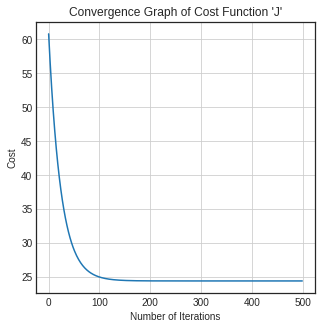

In [229]:
# Plot J history
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function 'J'")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

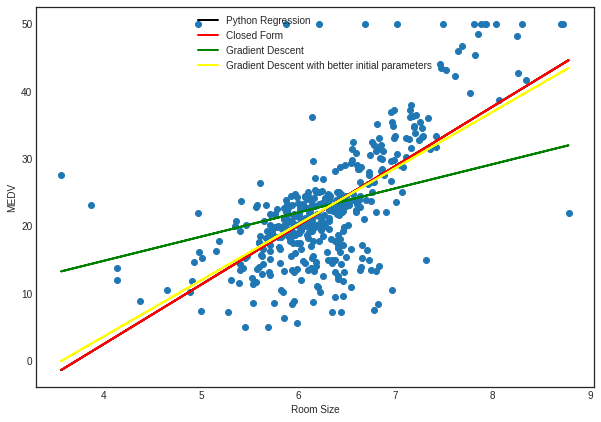

In [230]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_train[:,1], y_train)

Line1 = reg.intercept_[0] + X_train[:,1] * reg.coef_[0,1]
Line2 = theta_closedform[0] + X_train[:,1] * theta_closedform[1]
Line3 = theta[0] + X_train[:,1] * theta[1]
Line4 = theta_New[0] + + X_train[:,1] * theta_New[1]

plt.plot(X_train[:,1], Line1, color='black', linewidth = 2, label='Python Regression')
plt.plot(X_train[:,1], Line2, color='red', linewidth = 2, label='Closed Form')
plt.plot(X_train[:,1], Line3, color='green', linewidth = 2, label='Gradient Descent')
plt.plot(X_train[:,1], Line4, color='Yellow', linewidth = 2, label='Gradient Descent with better initial parameters')

plt.ylabel('MEDV')
plt.xlabel('Room Size')
leg = plt.legend(loc='upper center')
plt.show()

Now as we can see the result of gradient descent is very close to the right answer.   :)))

# Test Data and predictions:

Now I want to see how they work on Test data:

In [231]:
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

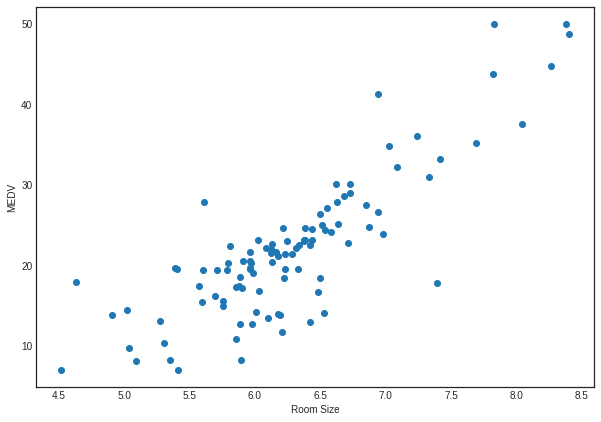

In [232]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_test[:,1], y_test)

plt.ylabel('MEDV')
plt.xlabel('Room Size')
plt.show()

In [233]:
# Answers for Line1/Line2:
y_pred1 = reg.predict(X_test)

In [234]:
# Answers for Line3:
y_pred3 = np.dot(X_test, theta)

In [235]:
# Answers for Line4:
y_pred4 = np.dot(X_test, theta_New)

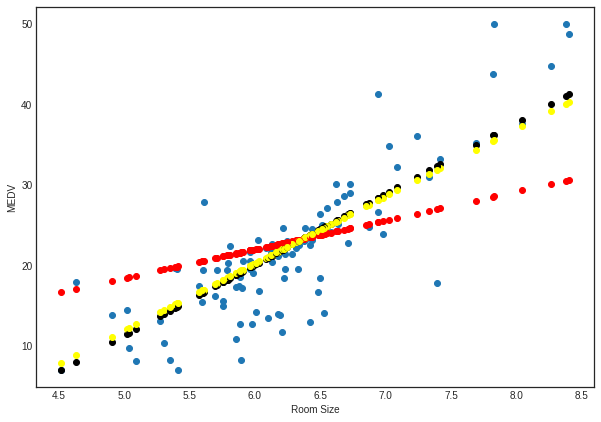

In [236]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_test[:,1], y_test)

for i in range(X_test.shape[0]):
  plt.plot(X_test[i,1], y_pred1[i,0], 'bo', color='black', linestyle="--")
  plt.plot(X_test[i,1], y_pred3[i,0], 'bo', color='red', linestyle="--")
  plt.plot(X_test[i,1], y_pred4[i,0], 'bo', color='yellow', linestyle="--")

plt.ylabel('MEDV')
plt.xlabel('Room Size')
plt.show()

# Evaluation:

In [237]:
#Evaluation function
def compute_cost_test(X, y_real, y_predicted):
  m = X.shape[0]
  cost = np.sum(np.square(y_predicted - y_real)) / (2*m)
  return cost

In [238]:
#Cost for test data with Line1/2:
compute_cost_test(X_test, y_test, y_pred1)

11.985227763995649

In [239]:
#Cost for test data with Line3:
compute_cost_test(X_test, y_test, y_pred3)

23.32169292335092

In [240]:
#Cost for test data with Line4:
compute_cost_test(X_test, y_test, y_pred4)

12.389038810925268

# **Concolution:**

The best way to find the solution is the closed form of the calculating coefficients of the line or hyperplane. But as we cannot always use this method, Gradient Descent is another method which we try to find the parameters, but the start point is very important in it.